In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('input/20181127_2_Board_ARC_3.csv', sep=';', usecols=[0,4,5,6,7], parse_dates=[2,3,4])

In [4]:
df.head()



,Art der Arbeit,Restaufwand [Tage],Next,In,Out
0,3,10,nan,2018-03-15,2018-07-27
1,3,10,nan,2018-03-15,2018-07-27
2,13,NaN,nan,2018-06-15,2018-07-27
3,11,NaN,nan,2018-05-01,2018-07-27
4,4,NaN,nan,2018-04-15,2018-07-27


In [ ]:
df.dtypes



In [5]:
df.columns = ['art', 'restaufwand', 'next', 'input', 'out']
df.art

0      3
1      3
2     13
3     11
4      4
5      8
6     11
7      4
8      2
9      3
10     3
11    11
12    12
13     4
14     2
15    12
16     9
17    14
18     3
19     5
20     8
21     4
22     8
23     9
24     8
25    12
26     3
27    14
28     2
29     3
      ..
64    15
65    17
66    17
67     8
68     9
69    17
70    12
71     9
72    14
73     3
74     2
75     9
76    14
77     3
78     3
79     9
80     9
81    10
82     8
83     5
84     2
85     3
86     2
87     8
88     8
89    14
90     9
91     2
92    12
93    17
Name: art, Length: 94, dtype: int64

In [ ]:
df.out - df.input


In [6]:
feiertage = ['2018-10-03', # Tag der Einheit
             '2018-11-01', # Allerheiligen
             '2018-12-24', # Heiligabend
             '2018-12-25', # Weihnachten
             '2018-12-26', # Weihnachten
            ]

# astype('datetime64[D]') notwendig
dauer=np.busday_count(df.input.values.astype('datetime64[D]'), 
                  df.out.values.astype('datetime64[D]'), 
                    holidays=feiertage)+1
dauer

array([ 97,  97,  31,  64,  75,   9,  20,  26,   6,  20,  18, 110,   9,
        27,  32,  25,   7,  27,   1,  71,  48,   4,   1,   6,   1,   4,
        39,  18,  13,  31,  41,   2,  10,  14,  17,  12,  14,   4,  39,
        32,  21,  28, 183,   3, 170,  14,   3,  20,  26,  33,  47,  35,
        26,   4,   5,  25,  25, 148,  80,  21,   9,   7,  30,   1,   2,
        39,  37,  40,   3,  11,  14,   2,   2,   1,   1,  24,  20,  14,
        49,   6,  -2,  11,   5,  54,  21,   3,  16,   1,   2,  16,  13,
         2,  96,  16])

In [7]:
df['dauer'] = dauer
#interpolation noch überprüfen
perc80 = np.percentile(df.dauer,80,interpolation='higher')
perc90 = np.percentile(df.dauer,90,interpolation='higher')

In [ ]:
drei = df.art == 14
df.art[drei]

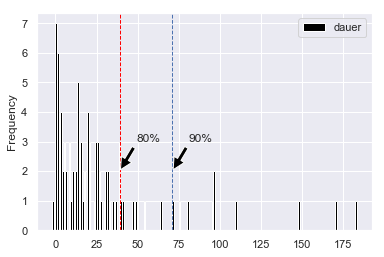

In [17]:
# gca stands for 'get current axis'
ax = plt.gca()
#hist zählt direkt die Elemente
df.plot(kind='hist',y='dauer',bins=max(dauer),rwidth=1, color='black', ax=ax)

# Annotate points
ax.annotate('90%', xy=(perc90, 2), xytext=(perc90+10, 3),
            arrowprops=dict(facecolor='black', shrink=0.05),)
# vertical dotted line originating at mean value
plt.axvline(perc90, linestyle='dashed', linewidth=1)

ax.annotate('80%', xy=(perc80, 2), xytext=(perc80+10, 3),
            arrowprops=dict(facecolor='black', shrink=0.05),)
# vertical dotted line originating at mean value
plt.axvline(perc80, linestyle='dashed', linewidth=1,color='red')

plt.show()

In [59]:
arten = df['art'].drop_duplicates()
margin_bottom = np.zeros(len(df['art'].drop_duplicates()))
                         
for  num , art in enumerate(arten):
    values = list(df[df['art'] == ada].loc[:, 'dauer'])
    print str(values)
    df[df['art'] == ada].plot.bar(x='art',y='dauer', ax=ax, stacked=True, 
                                    bottom = margin_bottom,  label=art)
    margin_bottom += values
  
    plt.show()

[97, 97, 20, 18, 1, 39, 31, 10, 1, 14, 49, 3]


ValueError: operands could not be broadcast together with shapes (12,) (14,) 

In [47]:
df['art'].drop_duplicates()

0      3
2     13
3     11
4      4
5      8
8      2
12    12
16     9
17    14
19     5
30    17
59    10
62     6
64    15
Name: art, dtype: int64